# Assignment 1: k-nearest neighbors

Only use the already imported libraries `numpy` and `matplotlib.pyplot` for the assignment. Do not import any other library. 

<h3>

Min Wang 3440557

Stoyan Dimitrov 3460278

Dominik Sellenthin 2836308</h3>

<h5>Note ：</h5>  We wish to present task1 and task2. If the solution of task3 is correct, we can also present task3.

In [10]:
# Load required packages and dataset. Do not modify.
import matplotlib.pyplot as plt
import numpy as np


def load_iris_dataset():
    from sklearn import datasets
    iris = datasets.load_iris()
    X = iris.data
    y = iris.target
    return X, y
    
X, y = load_iris_dataset()

## Task 1: Visualization and Preprocessing

1) Explain the content of the dataset in few words. What are the input features? What is the classification target? Check out: [https://en.wikipedia.org/wiki/Iris_flower_data_set](https://en.wikipedia.org/wiki/Iris_flower_data_set).


==> *Write your response here* (double klick here to edit)
Input features:        four numeric features: the sepal length, the sepal width, the petal length and the petal width, type: float
Classification target: three nominal class (three species of Iris (Iris setosa, Iris virginica and Iris versicolor)), labels are int64:0,1,2

2) Compute and print the following statistics about the dataset:
  - Number of samples
  - Number of samples per class
  - Mean and standard deviation for each input feature


In [11]:
# Implement your solution here.
num_sample = X.shape[0]               # Number of samples
num_sample_per_class_0 = np.sum(y==0) # Number of samples per class
num_sample_per_class_1 = np.sum(y==1)
num_sample_per_class_2 = np.sum(y==2)
mean_features = np.mean(X, axis=0)    # Mean and standard deviation for each input feature
st_deviations = np.std(X, axis=0)

print("Number of samples is: %d" % num_sample)
print("Number of samples class 0 is: %d" % num_sample_per_class_0)
print("Number of samples class 1 is: %d" % num_sample_per_class_1)
print("Number of samples class 2 is: %d" % num_sample_per_class_2)
print("Means of each feature are: ", np.around(mean_features, 3))
print("Standard deviation of each feature are: ", np.around(st_deviations, 3))

Number of samples is: 150
Number of samples class 0 is: 50
Number of samples class 1 is: 50
Number of samples class 2 is: 50
Means of each feature are:  [5.843 3.057 3.758 1.199]
Standard deviation of each feature are:  [0.825 0.434 1.759 0.76 ]


3) Visualize the variables Sepal length and Petal length in a scatter plot (Sepal length on the x-axis, petal length on the y-axis). Color each point of the plot according to its class.

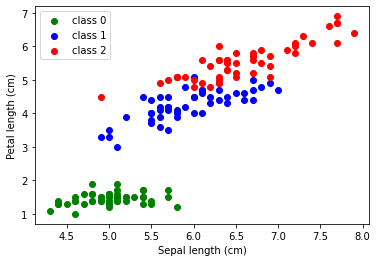

In [12]:
# Implement your solution here.
sepal_lengths = [X[y==0, 0], X[y==1, 0], X[y==2, 0]]
petal_lengths = [X[y==0, 2], X[y==1, 2], X[y==2, 2]]

fig = plt.figure()
ax = plt.subplot()
a1 = ax.scatter(sepal_lengths[0], petal_lengths[0], c='green')
a2 = ax.scatter(sepal_lengths[1], petal_lengths[1], c='blue')
a3 = ax.scatter(sepal_lengths[2], petal_lengths[2], c='red')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal length (cm)')
sp_labels = ['class 0', 'class 1', 'class 2']
plt.legend(handles=[a1, a2, a3],labels=sp_labels)
plt.show()

4) Split the dataset randomly into training and test data. 70% of data should be used for training and 30% should be used for testing. Implement the function `train_test_split`. Do not modify the interface of the function.

In [13]:
def train_test_split(X, y):
    """
    Returns X_train, X_test, y_train, y_test, 
        where X_train and X_test are the input features of the training and test set,
        and y_train and y_test are the class labels of the training and test set.
    """
    # Implement your solution here.
    test_split = 0.3                
    sample_size = X.shape[0]
    test_size = int(sample_size * test_split)

    indices = np.arange(sample_size)
    np.random.shuffle(indices)
    
    X_test = X[indices[:test_size], :]
    y_test = y[indices[:test_size]]
    X_train = X[indices[test_size:], :]
    y_train = y[indices[test_size:]]

    return X_train, X_test, y_train, y_test

np.random.seed(46)
X_train, X_test, y_train, y_test = train_test_split(X, y)

assert (X_train.shape[0] + X_test.shape[0]) == X.shape[0]
assert (y_train.shape[0] + y_test.shape[0]) == y.shape[0]
assert X_train.shape[1] == X_test.shape[1]

5) kNN uses a distance measure to identify close neighbors. If the input features are not of the same scale, the distance is not as meaningful, which can negatively impact classification performance. Perform min-max scaling (i.e. scale the values of the input features in such a way that their range is from 0 to 1) on the training and test data. Remember that you should only use information from the training data to perform the scaling on both data sets.

In [14]:
# Implement your solution here
X_train_min = np.amin(X_train, axis=0).reshape(1, -1)
X_train_max = np.amax(X_train, axis=0).reshape(1, -1)
print(X_train_min)
X_train = (X_train - X_train_min) / (X_train_max - X_train_min)
X_test = (X_test - X_train_min) / (X_train_max - X_train_min)

[[4.4 2.  1.  0.1]]


## Task 2: k-nearest neighbors

**For B.Sc. Data Science:**  
Implement the kNN algorithm with uniform weighting and arbitrary `k`. Fill out the `predict` method of class `KNearestNeighborsClassifier`. 

You can ignore the optional parameter `distance_metric`, which is provided as a field in the kNN class.

**For everyone else:**  
Implement the kNN algorithm with distance-based weighting and arbitrary `k`.
Fill out the `predict` method of class `KNearestNeighborsClassifier`.

The parameter `distance_metric` will either contain the string `uniform` or a function. If the value is `uniform`, the classifier should use uniform weighting. If the value is a function, the classifier should use the function as distance metric and perform distance-weighted classification. An example distance metric is provided with `euclidean_distance`.

In [15]:
class KNearestNeighbors(object):
    def __init__(self, k, distance_metric='uniform'):
        self.k = k
        self.distance_metric = distance_metric
        
    def fit(self, X, y):
        """
        This functions saves the training data to be used during the prediction.
        """
        self.X = X
        self.y = y
    
    def predict(self, X):
        """
        Returns a vector of shape (n,) if X has shape (n,k).
        """
        # Implement your solution here.
        dataset_size = self.X.shape[0]
        y_pred = np.ones(X.shape[0])
        for test_i in range(X.shape[0]):
            distance = euclidean_distance(np.tile(X[test_i, :].reshape(1,-1), (dataset_size, 1)), self.X)
            sort_distance_index = distance.argsort()
            
            class_counted = {}
            
            w_i = 1
            for i in range(self.k):
                if(self.distance_metric == 'euclidean'):
                    if distance[sort_distance_index[i]] == 0:
                        w_i = 9999.9
                    w_i = 1.0 / distance[sort_distance_index[i]]
                vote_i_label = self.y[sort_distance_index[i]]
                class_counted[vote_i_label] = class_counted.get(vote_i_label, 0) + w_i  # weight
            
            sort_class_counted = sorted(class_counted.items(), key=lambda f:f[1], reverse=True)
               
            y_pred[test_i] = sort_class_counted[0][0]
            
            
        return y_pred

    
def euclidean_distance(x1, x2):
    """
    Given vectors x1 and x2 with shape (n,) returns distance between vectors as float.
    """
    return np.sqrt(np.sum((x1 - x2)*(x1 - x2), axis=1))

## Task 3: Evaluation

1) Implement functions to compute precision, recall and F1-score. `y_pred` and `y_true` are the vectors of predicted and true class labels respectively with shape `(n,)`, where `n` is the number of samples. Each function should return a float containing the corresponding score.

In [16]:
# i just don't want to change the structure...
def precision(y_pred, y_true):
    # Implement your solution here.
    # average precision for all class
    y_labels = [0, 1, 2]
    pre_sum = 0
    for y_label_i in y_labels:
        tp_ = ((y_pred==y_label_i)&(y_true==y_label_i)).sum()
        fp_ = ((y_pred==y_label_i)&(y_true!=y_label_i)).sum()
        fn_ = ((y_pred!=y_label_i)&(y_true==y_label_i)).sum()
        tn_ = ((y_pred!=y_label_i)&(y_true!=y_label_i)).sum()
        pre_sum += (tp_ / (tp_ + fp_))
    return pre_sum / len(y_labels)
        
def recall(y_pred, y_true):
    # Implement your solution here.
    # average precision for all class
    y_labels = [0, 1, 2]
    rec_sum = 0
    for y_label_i in y_labels:
        tp_ = ((y_pred==y_label_i)&(y_true==y_label_i)).sum()
        fp_ = ((y_pred==y_label_i)&(y_true!=y_label_i)).sum()
        fn_ = ((y_pred!=y_label_i)&(y_true==y_label_i)).sum()
        tn_ = ((y_pred!=y_label_i)&(y_true!=y_label_i)).sum()
        rec_sum += (tp_ / (tp_ + fn_))
    return rec_sum / len(y_labels)

def f1score(y_pred, y_true):
    # Implement your solution here.
    # average precision for all class
    y_labels = [0, 1, 2]
    f_sum = 0
    for y_label_i in y_labels:
        tp_ = ((y_pred==y_label_i)&(y_true==y_label_i)).sum()
        fp_ = ((y_pred==y_label_i)&(y_true!=y_label_i)).sum()
        fn_ = ((y_pred!=y_label_i)&(y_true==y_label_i)).sum()
        tn_ = ((y_pred!=y_label_i)&(y_true!=y_label_i)).sum()
        f_sum += 2*tp_ / (2*tp_ + fn_ + fp_ )
    return f_sum / len(y_labels)

2) Evaluate the performance of kNN with uniform weighting on the Iris dataset for `k=1,3,5`. Train each of the `3` classifiers on the training data from Task 1. Perform the predictions on both the training and test data. Then compute precision, recall, and F1-score for each model and for both training and test data. Print all scores per model. What do you observe?

**For all students other than B.Sc. Data Science:** 
Evaluate the kNN classifier with Euclidean distance-weighting. Compare the performance to uniform-weighting. How does the performance change compared to uniform weighting for each `k`?

In [17]:
# Implement your solution here.
def evaluation(data, k=1, w='uniform'):
    X_train, X_test, y_train, y_test = data
    clf = KNearestNeighbors(k=k, distance_metric=w)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    precision_value = precision(y_pred, y_test)
    recall_value = recall(y_pred, y_test)
    f1_value = f1score(y_pred, y_test)
    
    return [precision_value, recall_value, f1_value]
    
data = X_train, X_test, y_train, y_test
# Uniform --- k = 1
uniform_k_1_results = evaluation(data, k=1, w='uniform')
print("uniform_k_1_results: precision:%f, recall:%f, f1_score:%f" % 
      (uniform_k_1_results[0], uniform_k_1_results[1], uniform_k_1_results[2]))

# Uniform --- k = 3
uniform_k_3_results = evaluation(data, k=3, w='uniform')
print("uniform_k_3_results: precision:%f, recall:%f, f1_score:%f" % 
      (uniform_k_3_results[0], uniform_k_3_results[1], uniform_k_3_results[2]))

# Uniform --- k = 5
uniform_k_5_results = evaluation(data, k=5, w='uniform')
print("uniform_k_5_results: precision:%f, recall:%f, f1_score:%f" % 
      (uniform_k_5_results[0], uniform_k_5_results[1], uniform_k_5_results[2]))

# Euclidean --- k = 1
euclidean_k_1_results = evaluation(data, k=1, w='euclidean')
print("euclidean_k_1_results: precision:%f, recall:%f, f1_score:%f" % 
      (euclidean_k_1_results[0], euclidean_k_1_results[1], euclidean_k_1_results[2]))

# Euclidean --- k = 3
euclidean_k_3_results = evaluation(data, k=3, w='euclidean')
print("euclidean_k_3_results: precision:%f, recall:%f, f1_score:%f" % 
      (euclidean_k_3_results[0], euclidean_k_3_results[1], euclidean_k_3_results[2]))

# Euclidean --- k = 5
euclidean_k_5_results = evaluation(data, k=5, w='euclidean')
print("euclidean_k_5_results: precision:%f, recall:%f, f1_score:%f" % 
      (euclidean_k_5_results[0], euclidean_k_5_results[1], euclidean_k_5_results[2]))

uniform_k_1_results: precision:0.907692, recall:0.907692, f1_score:0.904762
uniform_k_3_results: precision:0.907692, recall:0.907692, f1_score:0.904762
uniform_k_5_results: precision:0.880952, recall:0.882051, f1_score:0.880800
euclidean_k_1_results: precision:0.907692, recall:0.907692, f1_score:0.904762
euclidean_k_3_results: precision:0.907692, recall:0.907692, f1_score:0.904762
euclidean_k_5_results: precision:0.880952, recall:0.882051, f1_score:0.880800


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in double_scalars


k=5 seems to be too large for this task


3) Explain why kNN with `k=1` achieves perfect results on the training data. Why is it not the best model?

k=1 tested on the training data maps the test example exactly on themselves, achieving perfect score. But on new samples k=1 won't generalize well